In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from keras import backend as K

Using TensorFlow backend.
C:\Users\HP\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HP\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HP\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\HP\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: Future

In [6]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [7]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
x_train=np.reshape(x_train,(len(x_train),28,28,1))
x_test=np.reshape(x_test,(len(x_test),28,28,1))

In [8]:
noise_factor=0.5
x_train_noisy=x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0,size=x_train.shape)
x_test_noisy=x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0,size=x_test.shape)
x_train_noisy= np.clip(x_train_noisy,0.,1.)
x_test_noisy= np.clip(x_test_noisy,0.,1.)

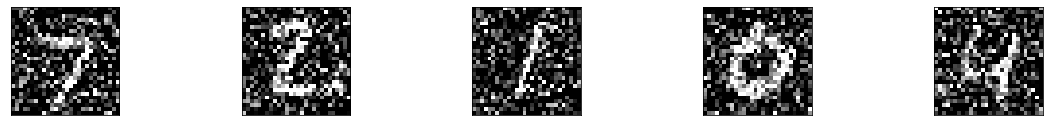

In [12]:
n=5
plt.figure(figsize=(20,2))
for i in range(n):
    ax=plt.subplot(1,n,i+1)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [13]:
input_img=Input(shape=(28,28,1))
x=Conv2D(32,(3,3),activation='relu',padding='same')(input_img)
x=MaxPooling2D((2,2),padding='same')(x)
x=Conv2D(32,(3,3),activation='relu',padding='same')(x)
encoded=MaxPooling2D((2,2),padding='same')(x)

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
x=Conv2D(32,(3,3),activation='relu',padding='same')(encoded)
x=UpSampling2D((2,2))(x)
x=Conv2D(32,(3,3),activation='relu',padding='same')(x)
x=UpSampling2D((2,2))(x)
decoded=Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)

In [15]:
x=Conv2D(32,(3,3),activation='relu',padding='same')(encoded)
x=UpSampling2D((2,2))(x)
x=Conv2D(32,(3,3),activation='relu',padding='same')(x)
x=UpSampling2D((2,2))(x)
decoded=Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)

In [16]:
autoencoder=Model(input_img,decoded)
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

In [18]:
autoencoder.fit(x_train_noisy,x_train,epochs=10,batch_size=128,shuffle=True,validation_data=(x_test_noisy,x_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 199s 3ms/step - loss: 0.1756 - val_loss: 0.1224
Epoch 2/10
60000/60000 [==============================] - 205s 3ms/step - loss: 0.1183 - val_loss: 0.1186
Epoch 3/10
60000/60000 [==============================] - 180s 3ms/step - loss: 0.1113 - val_loss: 0.1095
Epoch 4/10
60000/60000 [==============================] - 195s 3ms/step - loss: 0.1078 - val_loss: 0.1040
Epoch 5/10
60000/60000 [==============================] - 167s 3ms/step - loss: 0.1056 - val_loss: 0.1047
Epoch 6/10
60000/60000 [==============================] - 177s 3ms/step - loss: 0.1041 - val_loss: 0.1013
Epoch 7/10
60000/60000 [==============================] - 182s 3ms/step - loss: 0.1029 - val_loss: 0.1006
Epoch 8/10
60000/60000 [==============================] - 169s 3ms/step - loss: 0.1021 - val_loss: 0.0999
Epoch 9/10
60000/60000 [==============================

In [19]:
x_test_result = autoencoder.predict(x_test_noisy, batch_size=128)

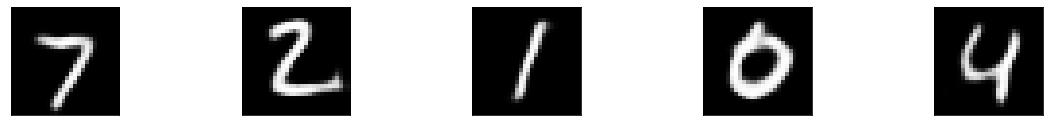

In [21]:
n=5
plt.figure(figsize=(20,2))
for i in range(n):
    ax=plt.subplot(1,n,i+1)
    plt.imshow(x_test_result[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()